# PROJET 3: Anticipez les besoins en consommation électrique de bâtiments

# Partie 2: Exploitation des données

## SOMMAIRE  <a class="anchor" id="sommaire"></a>
## [IMPORT DES LIBRAIRIES](#1)<a class="anchor" id="sommaire"></a>
## [CHARGEMENT DES DONNEES](#2)<a class="anchor" id="sommaire"></a>
## [ANALYSE DES VARIABLES](#3)<a class="anchor" id="sommaire"></a>
## [ANALYSE MULTIVARIEE](#4)<a class="anchor" id="sommaire"></a>
## [ANALYSE PCA ET CLUSTERING](#5)<a class="anchor" id="sommaire"></a>

In [ ]:
## [IMPORT DES LIBRAIRIES](#sommaire)<a class="anchor" id="1"></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
## [CHARGEMENT DES DONNEES](#sommaire)<a class="anchor" id="2"></a>

In [25]:
data=pd.read_csv('DatasetSeattle.csv',error_bad_lines=True,low_memory=False)
df=pd.DataFrame(data)
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,Neighborhood,Latitude,Longitude,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,OtherFuelUse(kBtu)
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,98101.0,DOWNTOWN,47.612200,-122.337990,...,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83,0.0
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,98101.0,DOWNTOWN,47.613170,-122.333930,...,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86,0.0
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101.0,DOWNTOWN,47.613930,-122.338100,...,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2089.28,2.19,0.0
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101.0,DOWNTOWN,47.614120,-122.336640,...,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,286.43,4.67,0.0
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,DOWNTOWN,47.613750,-122.340470,...,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,27985,2015,Multifamily LR (1-4),Low-Rise Multifamily,LICTON SPRINGS APT,9515 INTERLAKE AVE N,98103.0,NORTHWEST,47.698384,-122.341126,...,699376.0,752612.0,0.00,2.049750e+05,699405.0,0.00000,0.0,4.88,0.05,0.0
3328,28045,2015,Multifamily MR (5-9),Mid-Rise Multifamily,TRESSA APARTMENTS BUILDING 1,14100 LINDEN AVE N,98133.0,NORTHWEST,47.731728,-122.346962,...,8890235.0,9094326.0,0.00,2.248459e+06,7672061.0,12185.00000,1218492.0,118.20,0.23,0.0
3329,28064,2015,Multifamily LR (1-4),Low-Rise Multifamily,THE VILLAGE WEST APTS,2200 SW BARTON ST,98106.0,DELRIDGE,47.521419,-122.362525,...,1250592.0,1324891.0,0.00,3.665280e+05,1250644.0,0.00000,0.0,8.72,0.08,0.0
3330,49769,2015,Multifamily MR (5-9),Mid-Rise Multifamily,Test MF High Use (ID 49769),715 N 43RD ST,98103.0,LAKE UNION,47.659054,-122.349327,...,1007650.0,1282870.0,0.00,1.250000e+04,42652.0,9650.00000,965000.0,51.55,1.17,0.0


In [5]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'ZipCode', 'Neighborhood', 'Latitude',
       'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'OtherFuelUse(kBtu)'],
      dtype='object')

In [ ]:
## [ANALYSE DES VARIABLES](#sommaire)<a class="anchor" id="3"></a>

ValueError: num must be 1 <= num <= 15, not 16

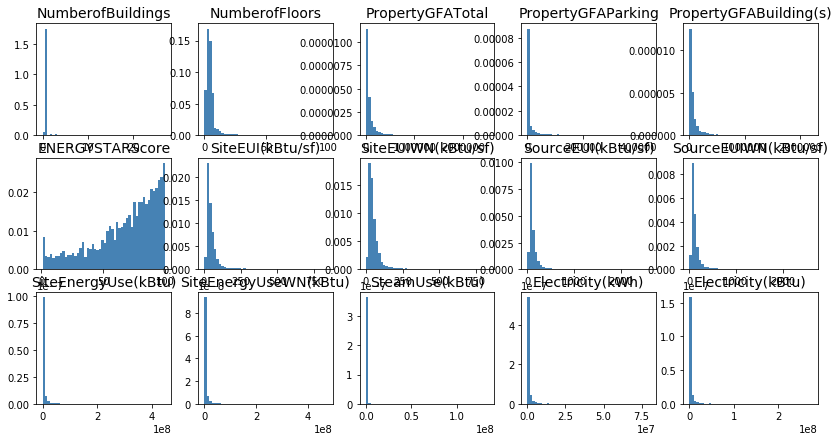

In [10]:
df1=df[['NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'OtherFuelUse(kBtu)']]
X=df1.values
fig = plt.figure(figsize=(14, 7))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(3,5, (feat_idx+1))
    h = ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(df1.columns[feat_idx], fontsize=14)

In [11]:
variablesqual=['DataYear', 'BuildingType', 'PrimaryPropertyType','YearBuilt', 'NumberofBuildings', 'NumberofFloors','ZipCode', 'Neighborhood']

In [26]:
dfghg=df[df['TotalGHGEmissions']<2000]

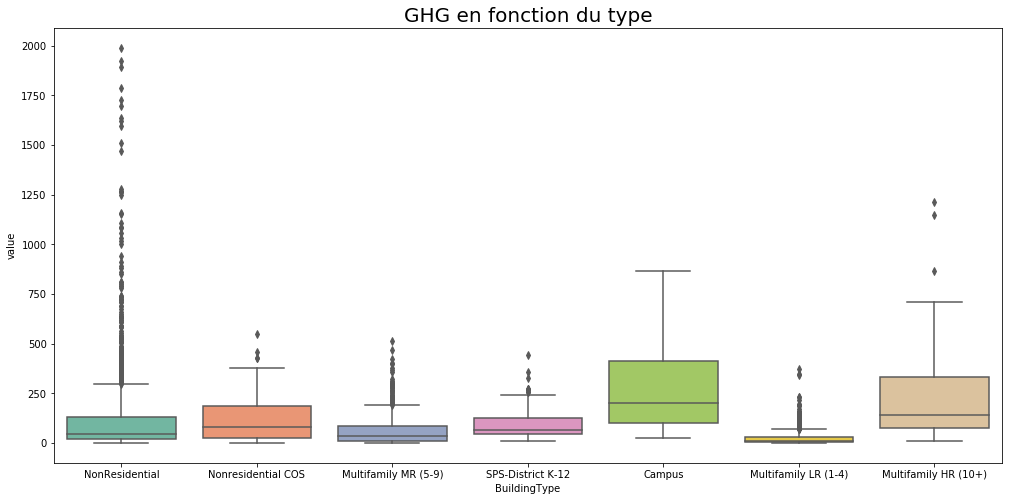

In [69]:
d_melt=pd.melt(dfghg,id_vars=['BuildingType'],value_vars=['TotalGHGEmissions'])
d_melt.drop(columns=['variable'])
(fig, ax) = plt.subplots(figsize=(17, 8))
ax.set_title("GHG en fonction du type",fontsize=20)
ax.set(xlabel="nutriscore_grade", ylabel="Quantité (en g)")
sns.boxplot(x='BuildingType', y="value",data=d_melt, palette="Set2") 
plt.show()

In [70]:
df[df['TotalGHGEmissions']>2000]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,Neighborhood,Latitude,Longitude,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,OtherFuelUse(kBtu)
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101.0,DOWNTOWN,47.613930,-122.338100,...,72587024.0,73937112.0,21566554.0,14515435.0,49526664.0,1.493800e+04,1493800.0,2089.28,2.19,0.0
33,43,2016,Campus,Mixed Use Property,Plant 2 Site,7755 E MARGINAL WAY S,98108.0,GREATER DUWAMISH,47.534930,-122.317880,...,448385312.0,471613856.0,0.0,44102076.0,150476283.0,2.979090e+06,297909000.0,16870.98,34.09,0.0
47,63,2016,NonResidential,Hotel,Sheraton Seattle Hotel,1400 6th Avenue,98101.0,DOWNTOWN,47.610870,-122.333390,...,80469216.0,82318072.0,11598686.0,13348631.0,45545529.0,2.332499e+05,23324992.0,2451.58,2.47,0.0
108,338,2016,NonResidential,Other,Jack R. McDonald Building,1900 9th Ave.,98101.0,DOWNTOWN,47.615980,-122.334480,...,65336980.0,66000296.0,0.0,8983483.0,30651644.0,3.468533e+05,34685331.0,2055.82,6.87,0.0
113,198,2016,NonResidential,Hospital,Seattle Children's Hospital Main Campus,4800 Sand Point Way NE,98105.0,NORTHEAST,47.662310,-122.281460,...,253832464.0,257764208.0,0.0,33892500.0,115641210.0,1.381912e+06,138191238.0,8145.52,9.27,0.0
153,268,2016,NonResidential,Hospital,Swedish Cherry Hill,500 17th Ave,98122.0,CENTRAL,47.607050,-122.309660,...,143423024.0,147299056.0,0.0,17220084.0,58754927.0,8.466809e+05,84668094.0,4906.33,8.21,0.0
156,276,2016,NonResidential,Hospital,Harborview Medical Center,325 9th Ave.,98104.0,EAST,47.603990,-122.323770,...,293090784.0,296671744.0,122575032.0,49438336.0,168683602.0,1.832129e+04,1832129.0,10734.57,9.26,0.0
246,389,2016,NonResidential,Hotel,Fairmont Olympic Seattle,411 University Street,98101.0,DOWNTOWN,47.608040,-122.333910,...,56485204.0,57051236.0,28438884.0,7056889.5,24078107.0,3.968211e+04,3968211.0,2573.75,4.75,0.0
323,477,2016,Campus,Other,Weintraub/Hutchinson/Thomas,1100 Fairview Ave N,98109.0,LAKE UNION,47.628550,-122.330350,...,131373880.0,137106112.0,0.0,18941222.0,64627449.0,6.674642e+05,66746425.0,3995.45,7.45,0.0
591,828,2016,NonResidential,Hospital,Swedish First Hill,747 Broadway,98122.0,EAST,47.608951,-122.322402,...,291614432.0,295929888.0,134943456.0,40842564.0,139354828.0,1.731612e+05,17316120.0,12307.16,6.97,0.0


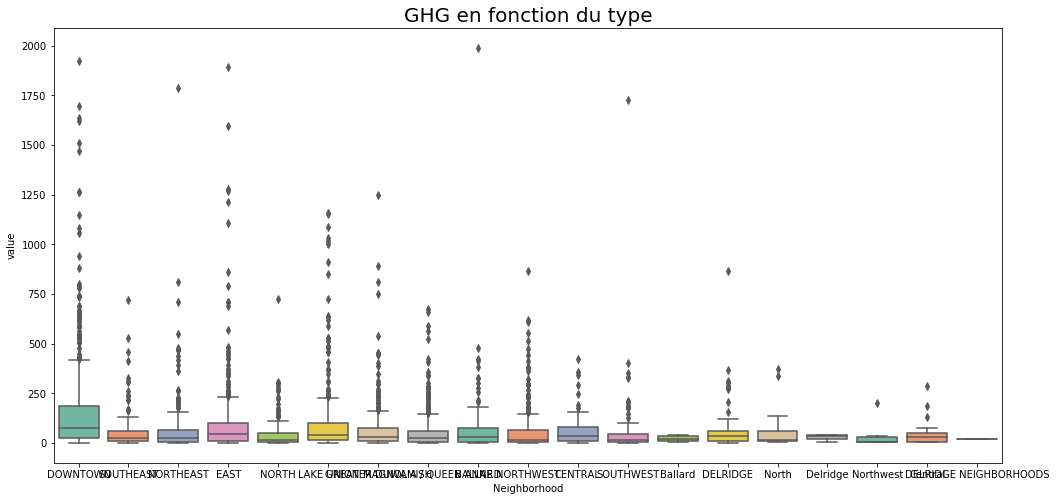

In [28]:
d_melt=pd.melt(dfghg,id_vars=['Neighborhood'],value_vars=['TotalGHGEmissions'])
d_melt.drop(columns=['variable'])
(fig, ax) = plt.subplots(figsize=(17, 8))
ax.set_title("GHG en fonction du type",fontsize=20)
ax.set(xlabel="nutriscore_grade", ylabel="Quantité (en g)")
sns.boxplot(x='Neighborhood', y="value",data=d_melt, palette="Set2") 
plt.show()

In [29]:
df['PrimaryPropertyType'].value_counts()

Low-Rise Multifamily              983
Mid-Rise Multifamily              557
Small- and Mid-Sized Office       299
Warehouse                         189
Other                             182
Large Office                      170
K-12 School                       123
Retail Store                      110
High-Rise Multifamily             104
Mixed Use Property                 98
Hotel                              76
Worship Facility                   70
Distribution Center                53
Senior Care Community              44
Medical Office                     43
Supermarket / Grocery Store        39
Parking                            32
Self-Storage Facility              28
Residence Hall                     23
University                         22
Laboratory                         13
Restaurant                         13
Refrigerated Warehouse             12
Community Center                   11
Hospital                           10
Museum                              9
Manufacturin

In [32]:
listUse=df['PrimaryPropertyType'].unique()
listUse2=[]
for i in listUse:
    if len(df[df['PrimaryPropertyType']==i])>50:
        listUse2.append(i)

In [33]:
listUse2

['Hotel',
 'Other',
 'Mid-Rise Multifamily',
 'Mixed Use Property',
 'K-12 School',
 'Small- and Mid-Sized Office',
 'Warehouse',
 'Large Office',
 'Retail Store',
 'Distribution Center',
 'Worship Facility',
 'Low-Rise Multifamily',
 'High-Rise Multifamily']

In [38]:
df3=df[df['PrimaryPropertyType'].isin(listUse2)]
dfghg3=df3[df3['TotalGHGEmissions']<2000]

In [39]:
df3['PrimaryPropertyType'].value_counts()

Low-Rise Multifamily           983
Mid-Rise Multifamily           557
Small- and Mid-Sized Office    299
Warehouse                      189
Other                          182
Large Office                   170
K-12 School                    123
Retail Store                   110
High-Rise Multifamily          104
Mixed Use Property              98
Hotel                           76
Worship Facility                70
Distribution Center             53
Name: PrimaryPropertyType, dtype: int64

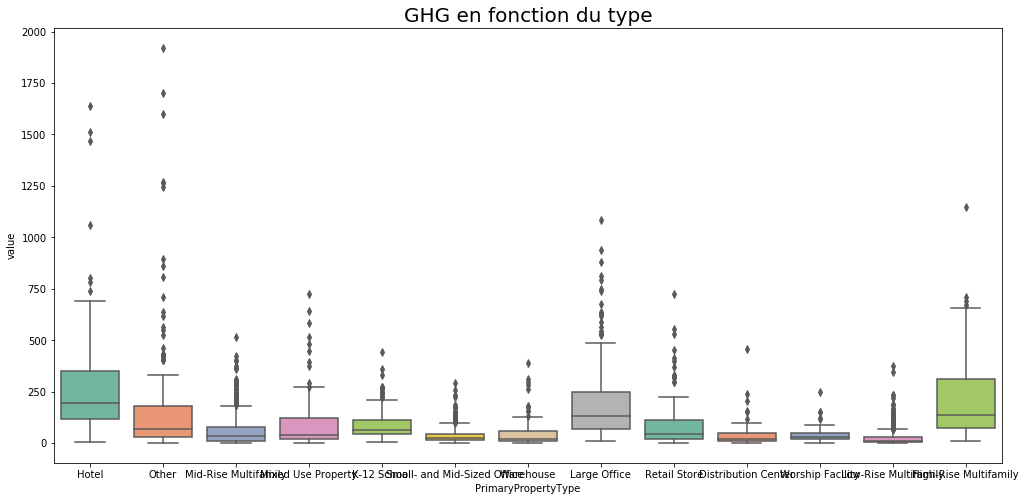

In [41]:
d_melt=pd.melt(dfghg3,id_vars=['PrimaryPropertyType'],value_vars=['TotalGHGEmissions'])
d_melt.drop(columns=['variable'])
(fig, ax) = plt.subplots(figsize=(17, 8))
ax.set_title("GHG en fonction du type",fontsize=20)
ax.set(xlabel="nutriscore_grade", ylabel="Quantité (en g)")
sns.boxplot(x='PrimaryPropertyType', y="value",data=d_melt, palette="Set2") 
plt.show()

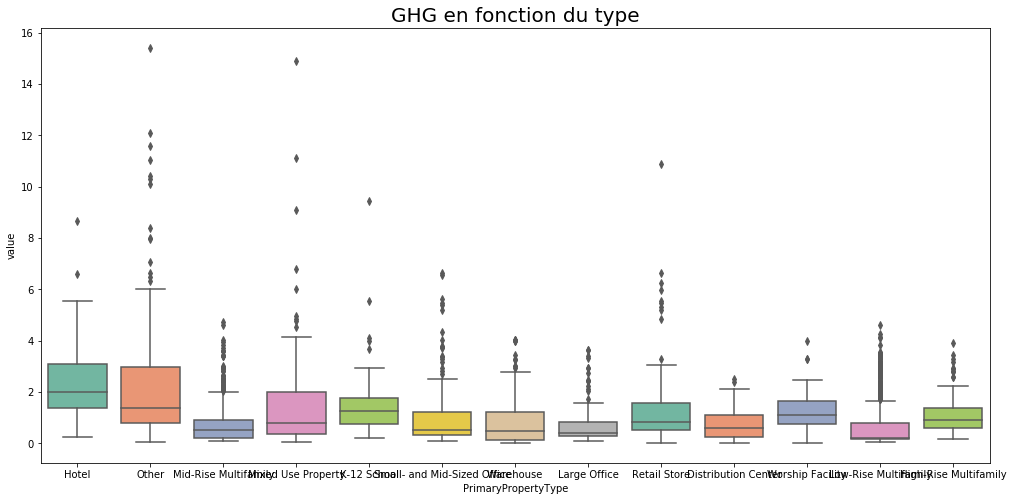

In [43]:
d_melt=pd.melt(dfghg3,id_vars=['PrimaryPropertyType'],value_vars=['GHGEmissionsIntensity'])
d_melt.drop(columns=['variable'])
(fig, ax) = plt.subplots(figsize=(17, 8))
ax.set_title("GHG en fonction du type",fontsize=20)
ax.set(xlabel="nutriscore_grade", ylabel="Quantité (en g)")
sns.boxplot(x='PrimaryPropertyType', y="value",data=d_melt, palette="Set2") 
plt.show()

In [44]:
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(PrimaryPropertyType)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(PrimaryPropertyType),724.606863,12.0,44.20655,4.445329e-97
Residual,4088.286196,2993.0,NaN,NaN


In [47]:
variablesquant=['Latitude','Longitude','NumberofBuildings','NumberofFloors','PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'OtherFuelUse(kBtu)']

In [48]:
dfquant=df[variablesquant]

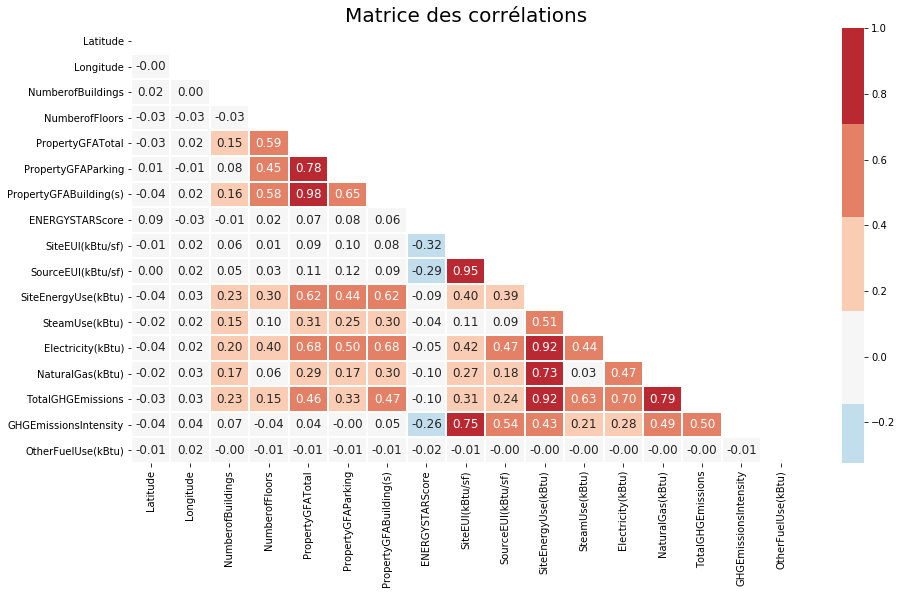

In [49]:
# Matrice des corrélations
corr = dfquant.corr()

# heatmap de la matrice de corrélation
plt.figure(figsize=(15,8))

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, center=0, cmap=sns.color_palette("RdBu_r", 7), linewidths=1, 
            annot=True, annot_kws={"size":12}, fmt=".02f")

plt.title('Matrice des corrélations', fontsize=20)
#plt.xticks(fontsize=10, rotation=45)
#plt.yticks(fontsize=10)
plt.show()

GFABuilding non nécessaire
Latitude
Longitude

In [ ]:
for i in df.index:
    df.loc[i,]

Text(0, 0.5, 'Density')

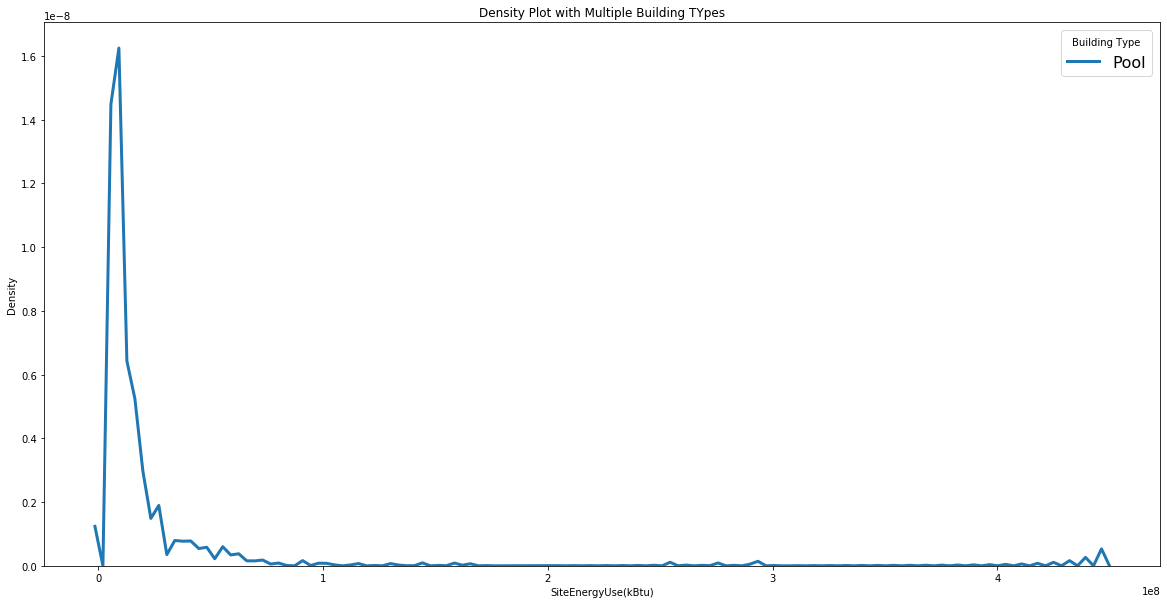

In [50]:
plt.figure(figsize=(20,10))

sns.distplot(df['SiteEnergyUse(kBtu)'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label=i)
    
# Plot formatting

plt.legend(prop={'size': 16}, title = 'Building Type')
plt.title('Density Plot with Multiple Building TYpes')
plt.xlabel('SiteEnergyUse(kBtu)')
plt.ylabel('Density')

In [57]:
from sklearn.preprocessing import PowerTransformer
box=PowerTransformer(method='box-cox')
X=box.fit_transform(df['SiteEnergyUse(kBtu)'].values.reshape(len(df['SiteEnergyUse(kBtu)']),1))

In [81]:
# Grille des courbes de densité
def densite(df, lines=7, cols=4):
    """
    Input : dataframe, lignes, colonnes
    Output : grille des courbes de densités des variables numériques du dataframe
    """
    df = df.select_dtypes(include='number').copy()
    
    fig, ax = plt.subplots(lines, cols, figsize=(min(15,cols*3),lines*2))

    for i,val in enumerate(df.columns.tolist()):
        bp = sns.distplot(df[val], hist=False, ax=ax[i//cols, i%cols], kde_kws={'shade':True})
        bp.set_title("skewness : "+str(round(df[val].skew(),1)), fontsize=12)
        bp.set_yticks([])
        imax = i

    for i in range(imax+1,lines*cols):
        ax[i//cols, i%cols].axis('off')
    
    plt.tight_layout()
    plt.show()


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

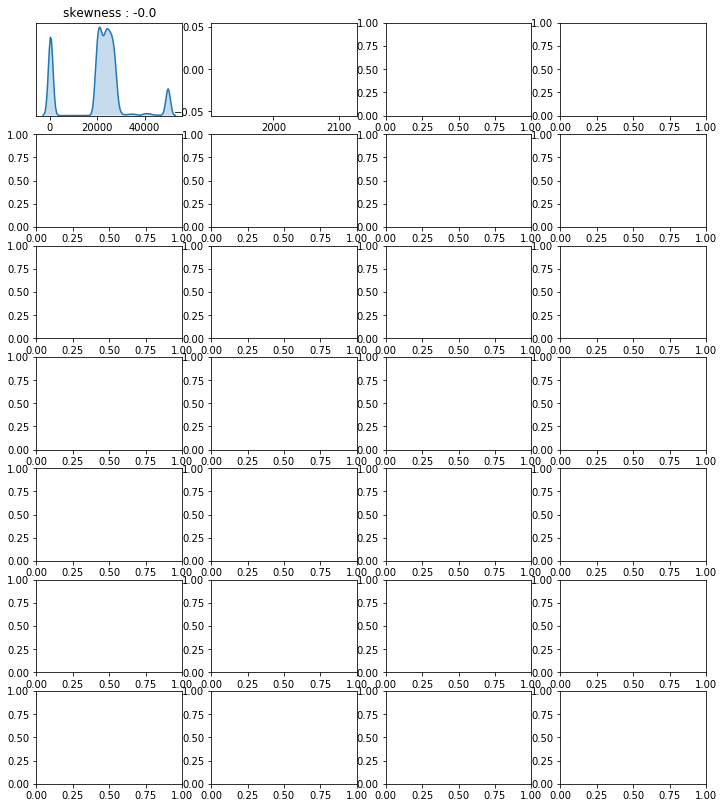

In [82]:
densite(df)

Text(0, 0.5, 'Density')

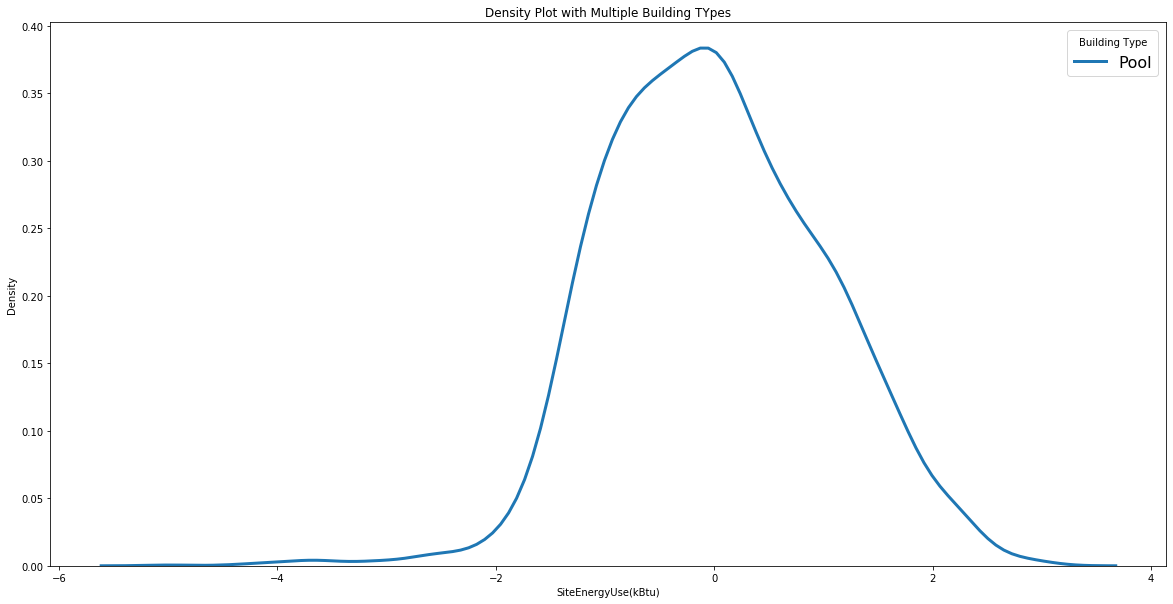

In [66]:
plt.figure(figsize=(20,10))

sns.distplot(X, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label=i)
    
# Plot formatting

plt.legend(prop={'size': 16}, title = 'Building Type')
plt.title('Density Plot with Multiple Building TYpes')
plt.xlabel('SiteEnergyUse(kBtu)')
plt.ylabel('Density')